[*********************100%%**********************]  20 of 20 completed
C:\Users\santoshbag\AppData\Local\Temp\ipykernel_4744\1784283692.py:47: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill", inplace=True)


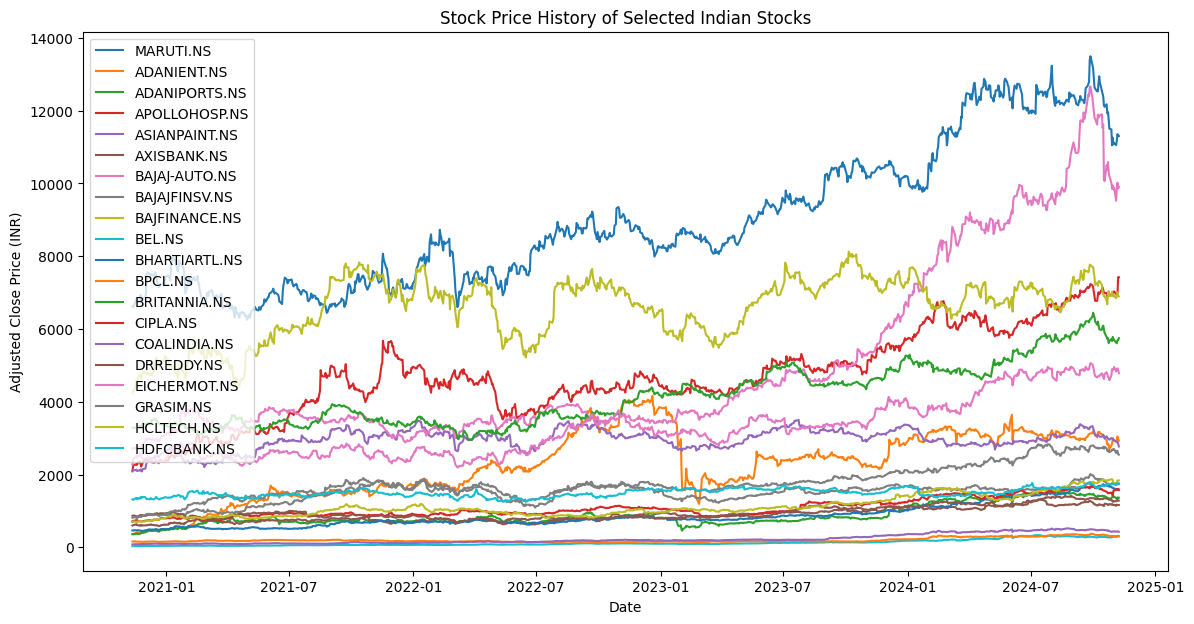

Ticker      ADANIENT.NS  ADANIPORTS.NS  APOLLOHOSP.NS  ASIANPAINT.NS  \
Date                                                                   
2020-11-13     0.008344      -0.006928       0.073610       0.003753   
2020-11-14     0.007189       0.001642       0.008319       0.002133   
2020-11-17     0.062087       0.037012       0.009936       0.001396   
2020-11-18     0.000507       0.030160      -0.008083       0.003703   
2020-11-19    -0.022180      -0.023524       0.004522      -0.015507   
...                 ...            ...            ...            ...   
2024-11-04    -0.017664      -0.032380      -0.010459      -0.008351   
2024-11-05     0.006264      -0.014749       0.001135      -0.009605   
2024-11-06     0.044829       0.030579       0.000258       0.003463   
2024-11-07    -0.024998      -0.012336       0.065549      -0.018793   
2024-11-08    -0.013804       0.006651      -0.000465      -0.025819   

Ticker      AXISBANK.NS  BAJAJ-AUTO.NS  BAJAJFINSV.NS  BAJFINAN

C:\Users\santoshbag\AppData\Local\Temp\ipykernel_4744\1784283692.py:65: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  returns = returns.fillna(method="ffill").dropna()


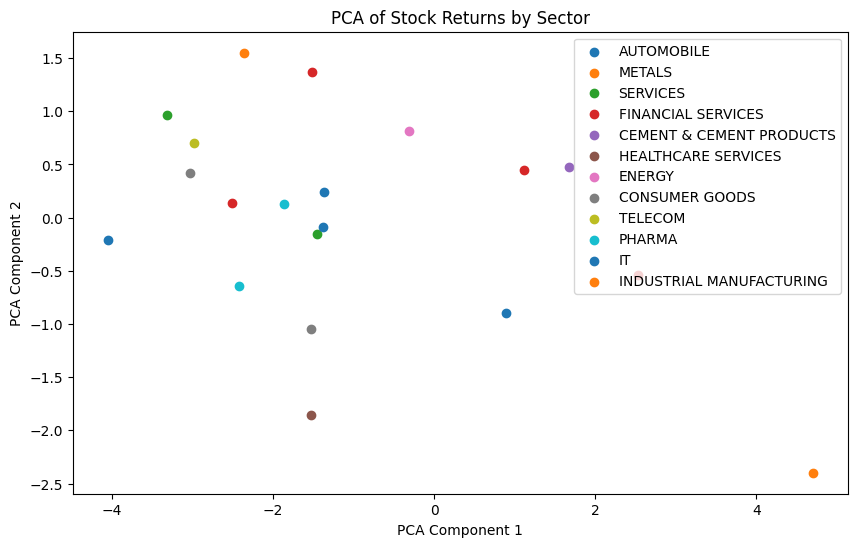

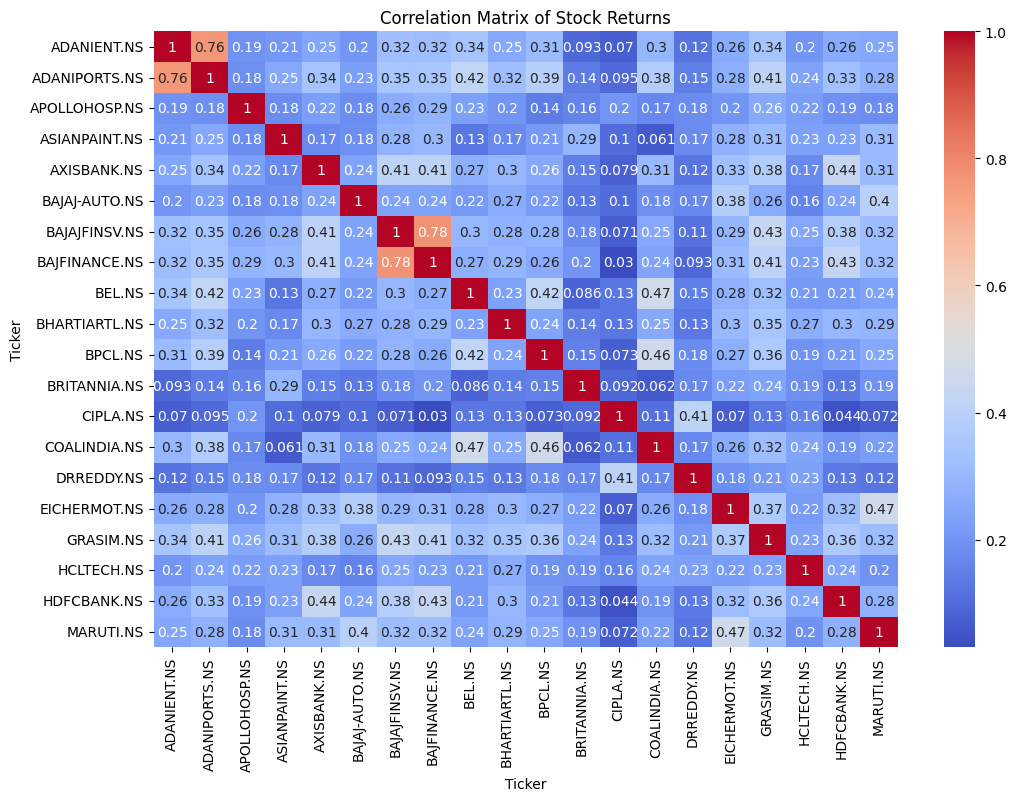

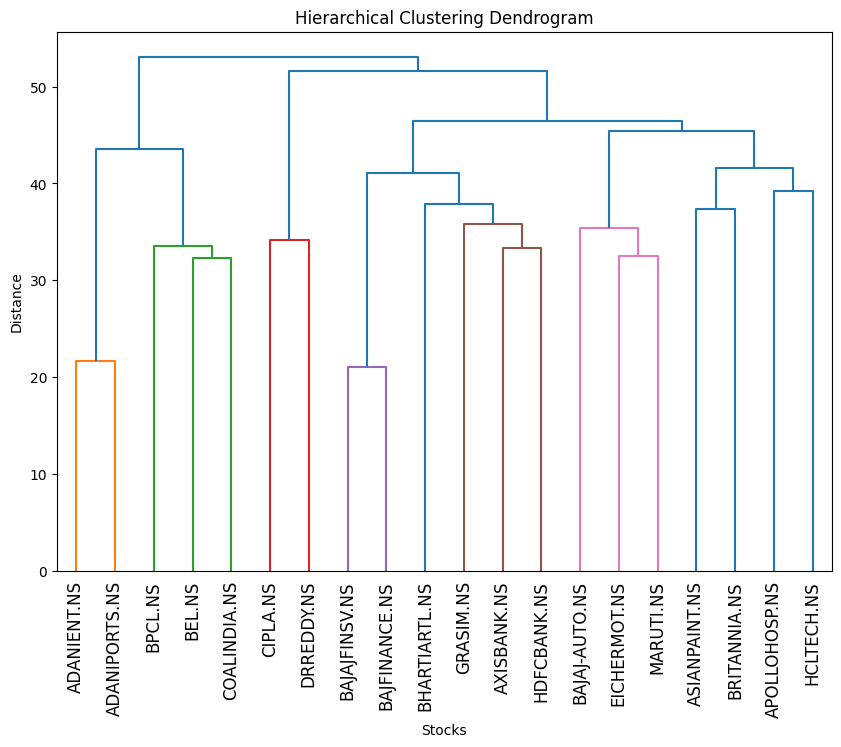

Cluster labels for each stock: {'ADANIENT.NS': 1, 'ADANIPORTS.NS': 1, 'APOLLOHOSP.NS': 1, 'ASIANPAINT.NS': 1, 'AXISBANK.NS': 2, 'BAJAJ-AUTO.NS': 1, 'BAJAJFINSV.NS': 1, 'BAJFINANCE.NS': 1, 'BEL.NS': 2, 'BHARTIARTL.NS': 1, 'BPCL.NS': 0, 'BRITANNIA.NS': 1, 'CIPLA.NS': 1, 'COALINDIA.NS': 1, 'DRREDDY.NS': 1, 'EICHERMOT.NS': 1, 'GRASIM.NS': 0, 'HCLTECH.NS': 1, 'HDFCBANK.NS': 0, 'MARUTI.NS': 0}
<class 'numpy.ndarray'>
[[-3.30843845  0.96143136]
 [-1.4516587  -0.15254749]
 [-1.53079403 -1.85494589]
 ...
 [-3.10776346  0.29084138]
 [ 2.3446543  -0.0333536 ]
 [ 1.25703871  0.46485303]]


C:\Users\santoshbag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


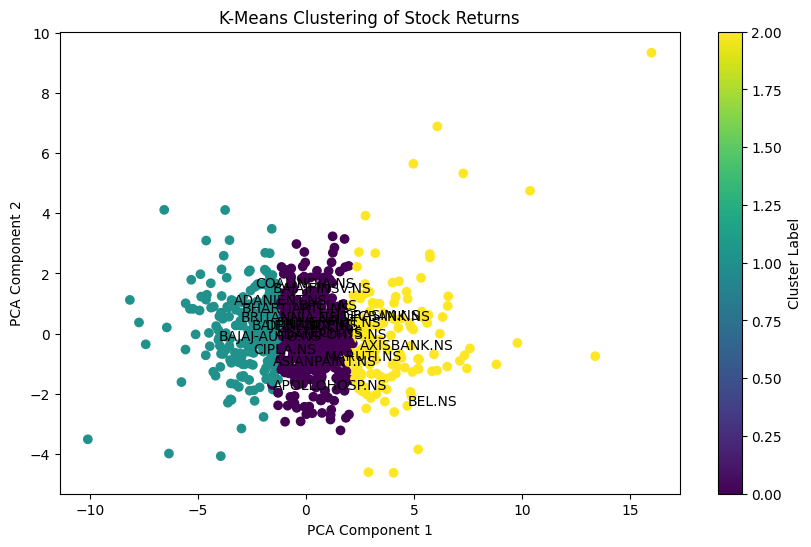

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
import datetime
import mrigutilities as mu


# Define stock symbols and sectors
stocks = {
    "RELIANCE.NS": "Energy",
    "TCS.NS": "Technology",
    "INFY.NS": "Technology",
    "HDFCBANK.NS": "Finance",
    "ICICIBANK.NS": "Finance",
    "HINDUNILVR.NS": "Consumer Goods",
    "ITC.NS": "Consumer Goods",
    "LT.NS": "Industrial",
    "SBIN.NS": "Finance",
    "ONGC.NS": "Energy"
}

engine = mu.sql_engine()
sql = '''
SELECT symbol||'.NS' as symbol, industry
	FROM security_master 
	where symbol in 
	('ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV', 'BEL', 'BPCL', 'BHARTIARTL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'ITC', 'INDUSINDBK', 'INFY', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NTPC', 'NESTLEIND', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBILIFE', 'SHRIRAMFIN', 'SBIN', 'SUNPHARMA', 'TCS', 'TATACONSUM', 'TATAMOTORS', 'TATASTEEL', 'TECHM', 'TITAN', 'TRENT', 'ULTRACEMCO', 'WIPRO')
'''
n50 = pd.read_sql(sql,engine).set_index('symbol')['industry'][:20].to_dict()
stocks = n50
today = datetime.date.today() - datetime.timedelta(days=3)
start = today - datetime.timedelta(days=365*4)

# Download historical data for one year
data = yf.download(list(stocks.keys()), start=start.strftime('%Y-%m-%d'), end=today.strftime('%Y-%m-%d'))['Adj Close']
# data = yf.download(list(stocks.keys()), start="2021-01-01", end="2024-11-10")['Adj Close']
# print(data)

# Fill missing values if any
data.fillna(method="ffill", inplace=True)

# Plot the stock price history
plt.figure(figsize=(14, 7))
for symbol in stocks:
    plt.plot(data[symbol], label=symbol)
plt.title("Stock Price History of Selected Indian Stocks")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (INR)")
plt.legend(loc="upper left")
plt.show()

# Calculate daily returns
returns = data.pct_change().dropna()
print(returns)
# Fill missing values in returns with forward fill and drop any remaining NaN rows
# print("Checking for NaN values in returns DataFrame:")
# print(returns.isna().sum())
returns = returns.fillna(method="ffill").dropna()

# print("Data types in returns DataFrame:")
# print(returns.dtypes)

# Add sector labels
sector_labels = [stocks[symbol] for symbol in returns.columns]

# Standardize returns for clustering
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)

# print("Shape of scaled returns data:", returns_scaled.shape)
# print("Type of returns_scaled:", type(returns_scaled))

# print("First few rows of scaled data:", returns_scaled[:5])


# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_results = pca.fit_transform(returns_scaled)

# Plot the PCA results with sector labels
plt.figure(figsize=(10, 6))
for sector in set(sector_labels):
    indices = [i for i, s in enumerate(sector_labels) if s == sector]
    plt.scatter(pca_results[indices, 0], pca_results[indices, 1], label=sector)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Stock Returns by Sector")
plt.legend()
plt.show()

# Correlation Analysis
corr_matrix = returns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", xticklabels=returns.columns, yticklabels=returns.columns)
plt.title("Correlation Matrix of Stock Returns")
plt.show()

# Hierarchical Clustering with Dendrogram
# linked = linkage(pairwise_distances(returns_scaled, metric='euclidean'), method='ward')
# Transpose returns_scaled to have stocks as rows (for clustering)
returns_scaled_T = returns_scaled.T

# Perform hierarchical clustering directly on the scaled returns
linked = linkage(returns_scaled_T, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(linked, labels=returns.columns, orientation='top', leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Stocks")
plt.ylabel("Distance")
plt.show()

# K-Means Clustering
# kmeans = KMeans(n_clusters=3)
kmeans = KMeans(n_clusters=3, random_state=42)  # Added random_state for reproducibility
try:
    kmeans.fit(returns_scaled)
    cluster_labels = kmeans.labels_
    print("Cluster labels for each stock:", dict(zip(returns.columns, cluster_labels)))
except Exception as e:
    # Print error details
    print("An error occurred during KMeans fitting:", e)
    print("Shape of returns_scaled:", returns_scaled.shape)
    print("First few rows of scaled data:", returns_scaled[:5])
    print("Type of returns_scaled:", type(returns_scaled))
print(type(pca_results))
print(pca_results)
# Visualize K-means Clustering in PCA space
plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=cluster_labels, cmap="viridis")
for i, symbol in enumerate(returns.columns):
    plt.text(pca_results[i, 0], pca_results[i, 1], symbol)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering of Stock Returns")
plt.colorbar(label="Cluster Label")
plt.show()


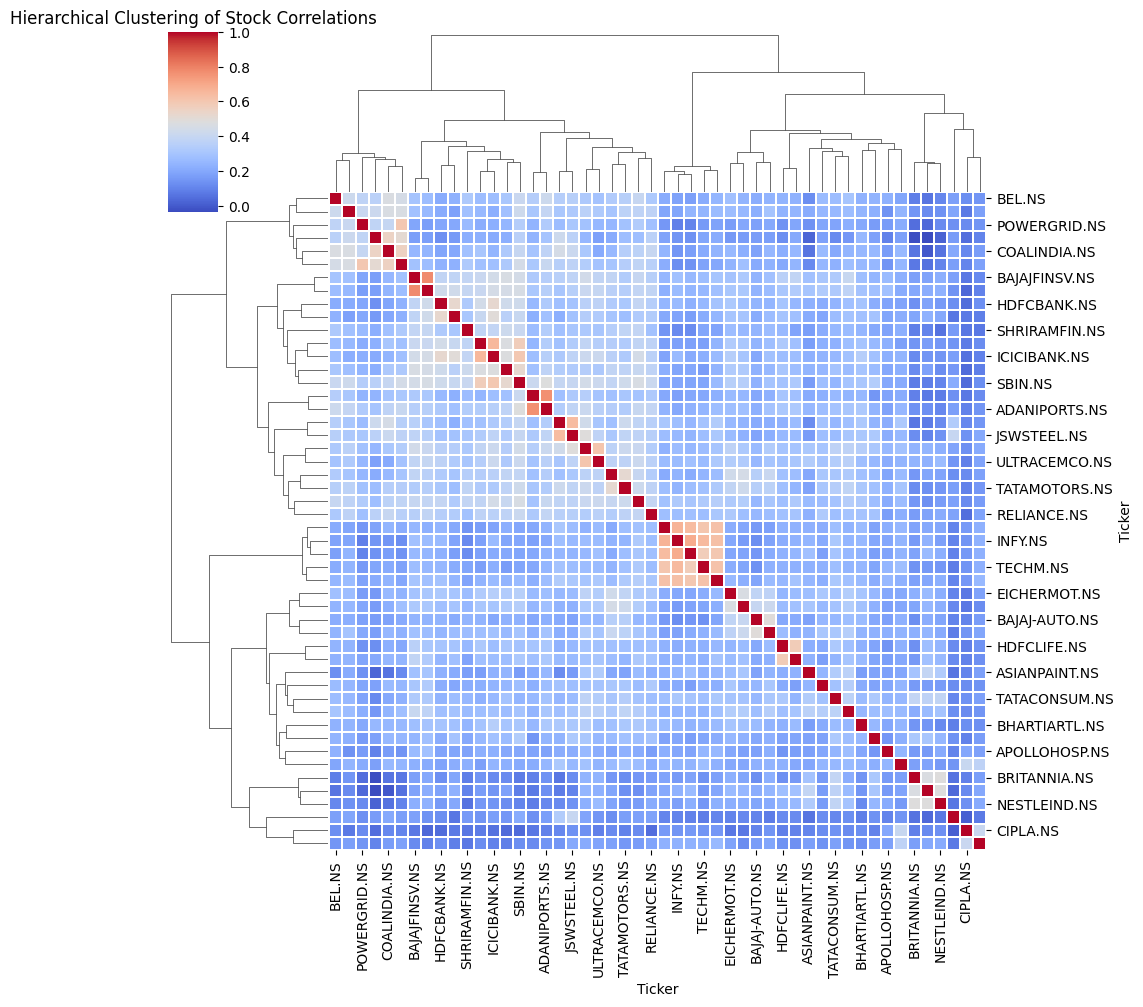

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming `corr_matrix` is your correlation matrix DataFrame
linkage_matrix = linkage(corr_matrix, method='ward')

sns.clustermap(corr_matrix, cmap="coolwarm", linewidths=0.1, figsize=(10, 10), row_linkage=linkage_matrix, col_linkage=linkage_matrix)
plt.title("Hierarchical Clustering of Stock Correlations")
plt.show()

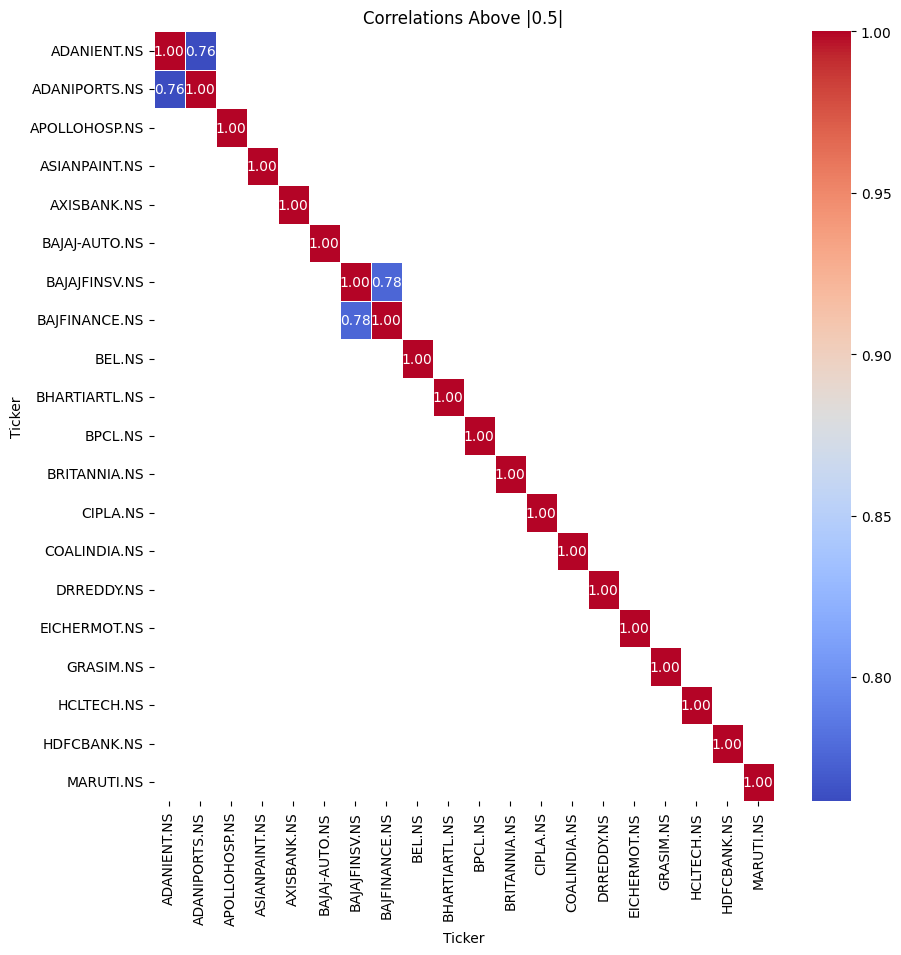

In [19]:
import numpy as np

threshold = 0.5
mask = (np.abs(corr_matrix) < threshold)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title(f"Correlations Above |{threshold}|")
plt.show()

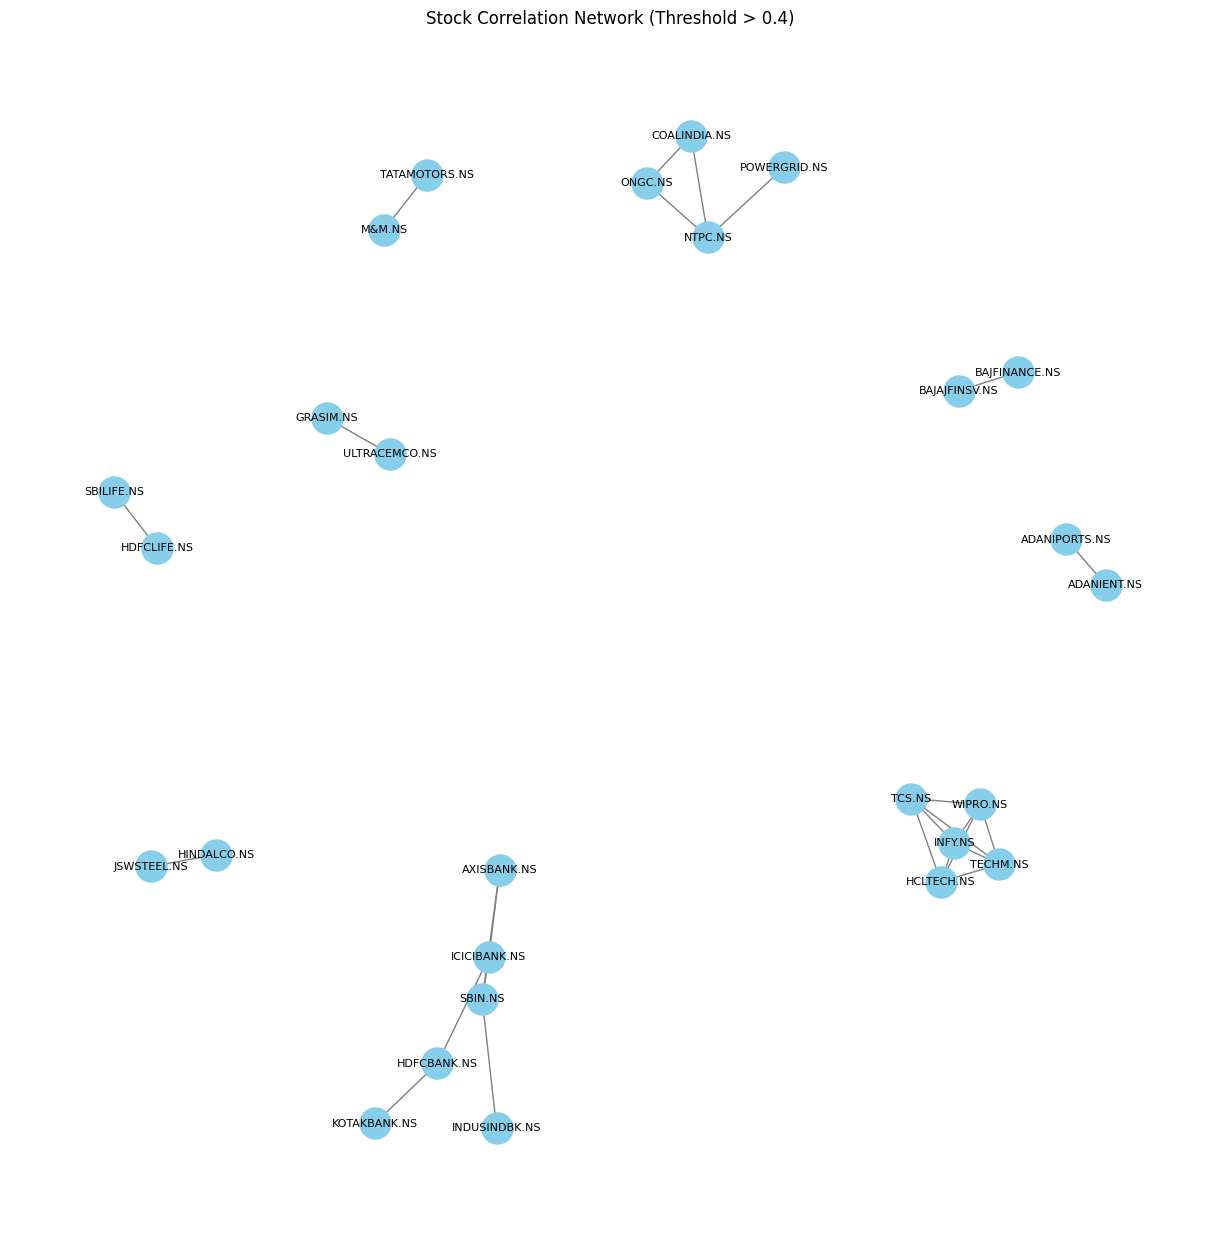

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > 0.5:
            G.add_edge(i, j, weight=corr_matrix.loc[i, j])

pos = nx.spring_layout(G, k=0.3)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=8, width=1)
plt.title("Stock Correlation Network (Threshold > 0.4)")
plt.show()

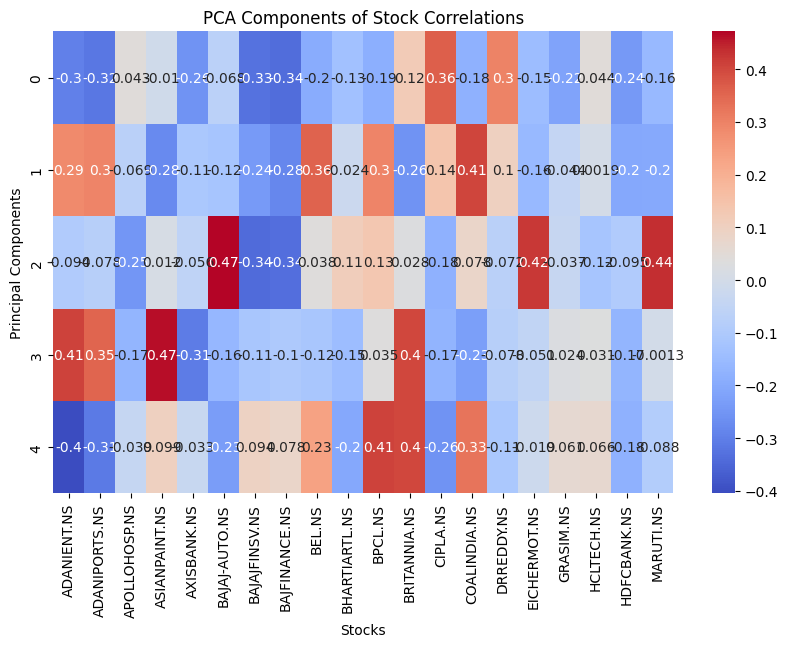

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # Choose number of components
pca_result = pca.fit_transform(corr_matrix)
pca_df = pd.DataFrame(pca.components_, columns=corr_matrix.columns)

plt.figure(figsize=(10, 6))
sns.heatmap(pca_df, cmap="coolwarm", annot=True)
plt.title("PCA Components of Stock Correlations")
plt.xlabel("Stocks")
plt.ylabel("Principal Components")
plt.show()

In [11]:
import mrigutilities as mu
import json
engine = mu.sql_engine()
sql = '''
SELECT symbol||'.NS' as symbol, industry
	FROM security_master 
	where symbol in 
	('ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV', 'BEL', 'BPCL', 'BHARTIARTL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'ITC', 'INDUSINDBK', 'INFY', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NTPC', 'NESTLEIND', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBILIFE', 'SHRIRAMFIN', 'SBIN', 'SUNPHARMA', 'TCS', 'TATACONSUM', 'TATAMOTORS', 'TATASTEEL', 'TECHM', 'TITAN', 'TRENT', 'ULTRACEMCO', 'WIPRO')
'''
n50 = pd.read_sql(sql,engine).set_index('symbol')['industry'].to_dict()
n50

{'MARUTI.NS': 'AUTOMOBILE',
 'ADANIENT.NS': 'SERVICES',
 'ADANIPORTS.NS': 'SERVICES',
 'APOLLOHOSP.NS': 'HEALTHCARE SERVICES',
 'ASIANPAINT.NS': 'CONSUMER GOODS',
 'AXISBANK.NS': 'FINANCIAL SERVICES',
 'BAJAJ-AUTO.NS': 'AUTOMOBILE',
 'BAJAJFINSV.NS': 'FINANCIAL SERVICES',
 'BAJFINANCE.NS': 'FINANCIAL SERVICES',
 'BEL.NS': 'INDUSTRIAL MANUFACTURING',
 'BHARTIARTL.NS': 'TELECOM',
 'BPCL.NS': 'ENERGY',
 'BRITANNIA.NS': 'CONSUMER GOODS',
 'CIPLA.NS': 'PHARMA',
 'COALINDIA.NS': 'METALS',
 'DRREDDY.NS': 'PHARMA',
 'EICHERMOT.NS': 'AUTOMOBILE',
 'GRASIM.NS': 'CEMENT & CEMENT PRODUCTS',
 'HCLTECH.NS': 'IT',
 'HDFCBANK.NS': 'FINANCIAL SERVICES',
 'HEROMOTOCO.NS': 'AUTOMOBILE',
 'HINDALCO.NS': 'METALS',
 'HINDUNILVR.NS': 'CONSUMER GOODS',
 'ICICIBANK.NS': 'FINANCIAL SERVICES',
 'M&M.NS': 'AUTOMOBILE',
 'INDUSINDBK.NS': 'FINANCIAL SERVICES',
 'INFY.NS': 'IT',
 'ITC.NS': 'CONSUMER GOODS',
 'JSWSTEEL.NS': 'METALS',
 'KOTAKBANK.NS': 'FINANCIAL SERVICES',
 'LT.NS': 'CONSTRUCTION',
 'NESTLEIND.NS': 'C